In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf 

In [4]:
airlines = pd.read_csv("C:/Users/ajink/Downloads/airline-passengers.csv")

In [5]:
airlines.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
airlines.shape

(144, 2)

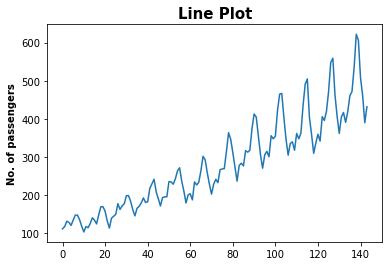

In [11]:
# Visualizing the overall data in order to the components present in our data
plt.title("Line Plot", size = 15, weight = 'bold')
plt.ylabel("No. of passengers", size = 10, weight = 'bold')
plt.plot(airlines['Passengers'])

<function matplotlib.pyplot.show(close=None, block=None)>

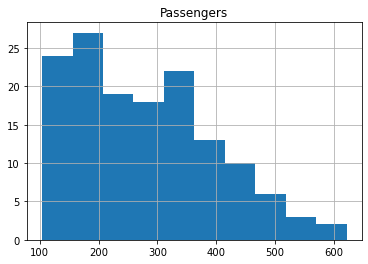

In [12]:
# checking the normality of the data 

airlines.hist()
plt.show

Text(0.5, 1.0, 'Density Plot')

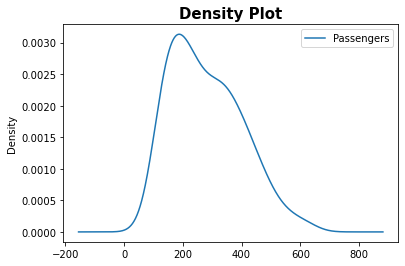

In [18]:
airlines.plot(kind = 'kde')
plt.title("Density Plot",size = 15, weight = 'bold')

In [19]:
airlines["Date"] = pd.to_datetime(airlines.Month,format="%Y-%m")

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

airlines["month"] = airlines.Date.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Date.dt.strftime("%Y") # year extraction

#airlines["Day"] = airlines.Date.dt.strftime("%d") # Day extraction
#airlines["wkday"] = airlines.Date.dt.strftime("%A") # weekday extraction

In [20]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [21]:
month_dummies = pd.DataFrame(pd.get_dummies(airlines['month']))

In [22]:
month_dummies

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,1,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,0,1
141,0,0,0,0,0,0,0,0,0,0,1,0
142,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
data = pd.concat([airlines,month_dummies], axis = 1)

In [29]:
data

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1949-01,112,1949-01-01,Jan,1949,0,0,0,0,1,0,0,0,0,0,0,0
1,1949-02,118,1949-02-01,Feb,1949,0,0,0,1,0,0,0,0,0,0,0,0
2,1949-03,132,1949-03-01,Mar,1949,0,0,0,0,0,0,0,1,0,0,0,0
3,1949-04,129,1949-04-01,Apr,1949,1,0,0,0,0,0,0,0,0,0,0,0
4,1949-05,121,1949-05-01,May,1949,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08,606,1960-08-01,Aug,1960,0,1,0,0,0,0,0,0,0,0,0,0
140,1960-09,508,1960-09-01,Sep,1960,0,0,0,0,0,0,0,0,0,0,0,1
141,1960-10,461,1960-10-01,Oct,1960,0,0,0,0,0,0,0,0,0,0,1,0
142,1960-11,390,1960-11-01,Nov,1960,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
data["t"] = np.arange(1,145)

data["t_squared"] = data["t"]*data["t"]
data.columns
data["log_Passengers"] = np.log(data["Passengers"])

In [39]:
data

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1949-01,112,1949-01-01,Jan,1949,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1949-02,118,1949-02-01,Feb,1949,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1949-03,132,1949-03-01,Mar,1949,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1949-04,129,1949-04-01,Apr,1949,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1949-05,121,1949-05-01,May,1949,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08,606,1960-08-01,Aug,1960,0,1,0,0,0,0,0,0,0,0,0,0,140,19600,6.406880
140,1960-09,508,1960-09-01,Sep,1960,0,0,0,0,0,0,0,0,0,0,0,1,141,19881,6.230481
141,1960-10,461,1960-10-01,Oct,1960,0,0,0,0,0,0,0,0,0,0,1,0,142,20164,6.133398
142,1960-11,390,1960-11-01,Nov,1960,0,0,0,0,0,0,0,0,0,1,0,0,143,20449,5.966147


<AxesSubplot:xlabel='month', ylabel='year'>

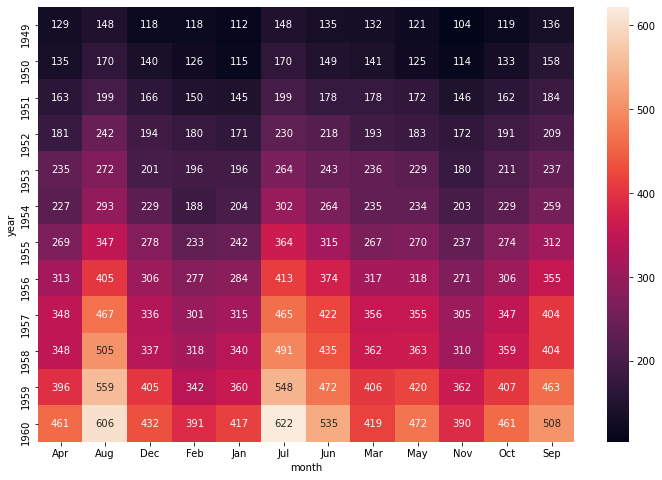

In [46]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Passengers'>

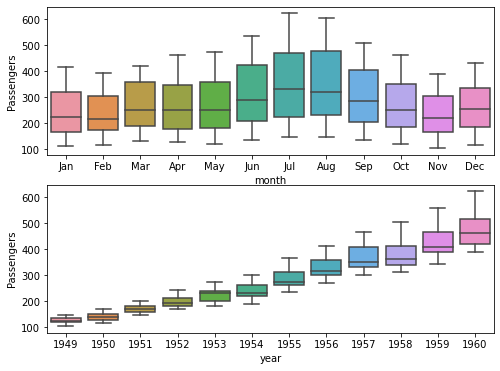

In [54]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

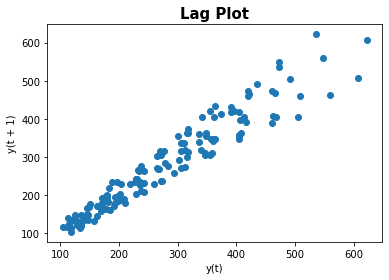

In [55]:
# lag plot to know the relationship
lag_plot(data['Passengers'])
plt.title("Lag Plot", size = 15, weight = "bold")
plt.show()

We can see that there is a strong linear relationship between the output and its lagged version, by default value of k will be 1

<Figure size 1080x576 with 0 Axes>

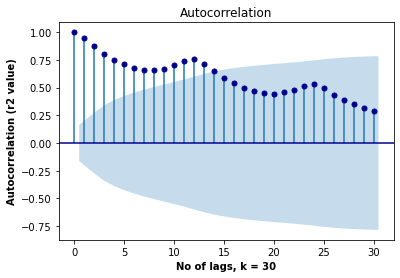

In [63]:
# ACF plot

plt.figure(figsize = (15,8))
plot_acf(data['Passengers'], lags = 30, color = 'darkblue')                                              # lags = 30 means it will plot for k = 30 lags 
plt.xlabel("No of lags, k = 30", size = 10, weight = 'bold')
plt.ylabel("Autocorrelation (r2 value)", size = 10, weight = 'bold')
plt.show()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

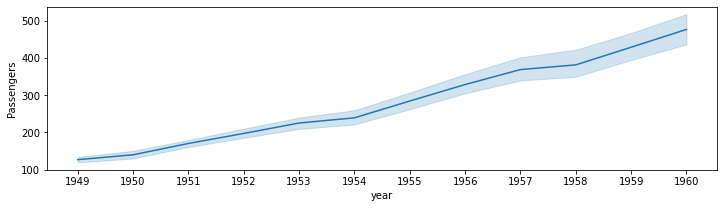

In [64]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

<AxesSubplot:>

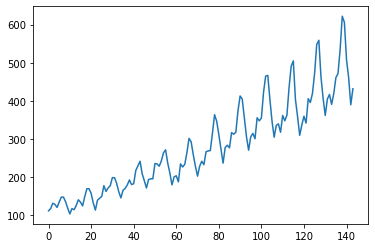

In [65]:
data['Passengers'].plot()

In [66]:
# Splitting Data into train and test

train = data.head(132)
test  = data.tail(12)

In [67]:
train

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1949-01,112,1949-01-01,Jan,1949,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1949-02,118,1949-02-01,Feb,1949,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1949-03,132,1949-03-01,Mar,1949,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1949-04,129,1949-04-01,Apr,1949,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1949-05,121,1949-05-01,May,1949,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1959-08,559,1959-08-01,Aug,1959,0,1,0,0,0,0,0,0,0,0,0,0,128,16384,6.326149
128,1959-09,463,1959-09-01,Sep,1959,0,0,0,0,0,0,0,0,0,0,0,1,129,16641,6.137727
129,1959-10,407,1959-10-01,Oct,1959,0,0,0,0,0,0,0,0,0,0,1,0,130,16900,6.008813
130,1959-11,362,1959-11-01,Nov,1959,0,0,0,0,0,0,0,0,0,1,0,0,131,17161,5.891644


In [68]:
test

,Month,Passengers,Date,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
132,1960-01,417,1960-01-01,Jan,1960,0,0,0,0,1,0,0,0,0,0,0,0,133,17689,6.033086
133,1960-02,391,1960-02-01,Feb,1960,0,0,0,1,0,0,0,0,0,0,0,0,134,17956,5.968708
134,1960-03,419,1960-03-01,Mar,1960,0,0,0,0,0,0,0,1,0,0,0,0,135,18225,6.037871
135,1960-04,461,1960-04-01,Apr,1960,1,0,0,0,0,0,0,0,0,0,0,0,136,18496,6.133398
136,1960-05,472,1960-05-01,May,1960,0,0,0,0,0,0,0,0,1,0,0,0,137,18769,6.156979
137,1960-06,535,1960-06-01,Jun,1960,0,0,0,0,0,0,1,0,0,0,0,0,138,19044,6.282267
138,1960-07,622,1960-07-01,Jul,1960,0,0,0,0,0,1,0,0,0,0,0,0,139,19321,6.432940
139,1960-08,606,1960-08-01,Aug,1960,0,1,0,0,0,0,0,0,0,0,0,0,140,19600,6.406880
140,1960-09,508,1960-09-01,Sep,1960,0,0,0,0,0,0,0,0,0,0,0,1,141,19881,6.230481
141,1960-10,461,1960-10-01,Oct,1960,0,0,0,0,0,0,0,0,0,0,1,0,142,20164,6.133398


In [75]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t', data = train).fit()
pred_linear  =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear  = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
print("Root Mean Square Error : ",rmse_linear)

Root Mean Square Error :  78.82273053909205


In [80]:
Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("Root Mean Square Error : ",rmse_Exp)

Root Mean Square Error :  79.36672652506945


In [86]:
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
print("Root Mean Square Error : ",rmse_Quad)

Root Mean Square Error :  73.2809525234383


In [95]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("Root Mean Square Error : ",rmse_add_sea)

Root Mean Square Error :  217.43312989965773


In [102]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("Root Mean Square Error : ",rmse_add_sea_quad)

Root Mean Square Error :  39.94692565673962


In [108]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_sea)

Root Mean Square Error :  237.01264271724335


In [114]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("Root Mean Square Error : ",rmse_Mult_add_sea) 

Root Mean Square Error :  40.15013647429733


In [123]:
Final_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
Final_result = pd.DataFrame(Final_data)
Final_result.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,39.946926
6,rmse_Mult_add_sea,40.150136
2,rmse_Quad,73.280953
0,rmse_linear,78.822731
1,rmse_Exp,79.366727
3,rmse_add_sea,217.433130
5,rmse_Mult_sea,237.012643


In [124]:
Final_pred = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=data).fit()

In [128]:
pred_new  = pd.Series(Final_pred.predict(data))
pred_new

0       90.190479
1       82.498432
2      116.723051
3      112.697670
4      116.505623
          ...    
139    546.919084
140    499.194465
141    464.303179
142    431.495226
143    461.437274
Length: 144, dtype: float64